# Vibration detection using Machine Learning and the databot2.0

## Imports

In [103]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Gather / Collect Data

### First look at what stationary data looks like and vibration data looks like

It is important to understand what the sensor data is doing.  

We are trying to answer the questions:

* What does the databot produce for acceleration data if the databot is not moving?

* What does the databot produce for acceleration data when the databot is moving?

To keep this simple, let's just look at acceleration data in the X direction.

Open file:  vibration/pydatabot_x_direction_acceleration.py


#### Read the stationary x direction acceleration values

In [104]:
df = pd.read_json("./data/stationary_x_acceleration.json", lines=True)

In [105]:
df.shape

(121, 2)

In [106]:
df.head(20)

,time,linear_acceleration_x
0,0.1,0.09
1,0.2,0.09
2,0.3,0.12
3,0.4,0.11
4,0.5,0.11
5,0.6,0.11
6,0.7,0.12
7,0.8,0.11
8,0.9,0.13
9,1.0,0.13


#### Plot the X direction stationary acceleration values

<Axes: xlabel='time', ylabel='linear_acceleration_x'>

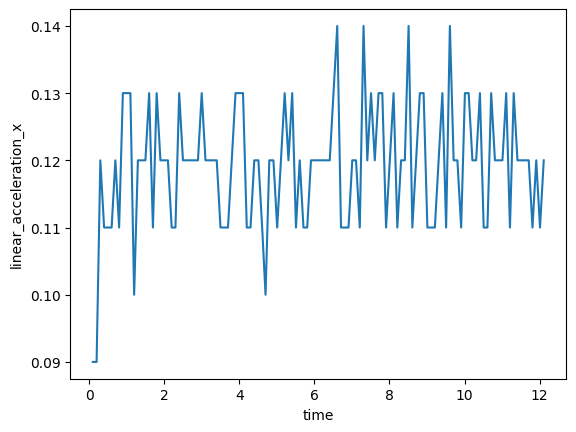

In [107]:
sns.lineplot(x='time', y='linear_acceleration_x', data=df)

#### Plot the X direction moving acceleration values

In [108]:
df_moving = pd.read_json("./data/moving_x_acceleration.json", lines=True)

In [109]:
df_moving.shape

(59, 2)

In [110]:
df_moving.tail()

,time,linear_acceleration_x
54,5.51,0.12
55,5.62,0.13
56,5.72,0.10
57,5.82,0.14
58,5.92,0.11


<Axes: xlabel='time', ylabel='linear_acceleration_x'>

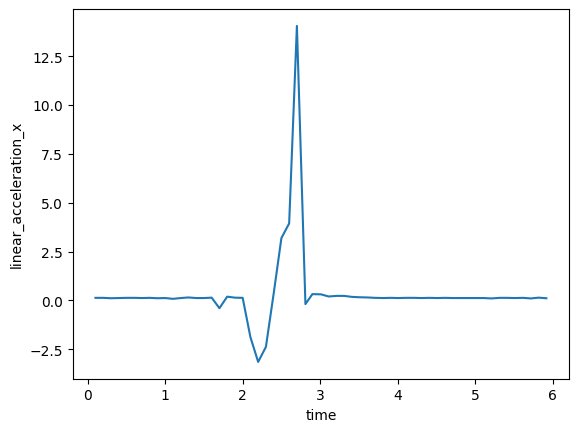

In [111]:
sns.lineplot(x='time', y='linear_acceleration_x', data=df_moving)

### Collect our training data

#### Collect the stationary or non-vibrating data

In [112]:
df_no_vibration = pd.read_json("./data/no_vibration.json", lines=True)

In [113]:
df_no_vibration.shape

(1000, 6)

In [114]:
df_no_vibration.head()

,time,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,vibration
0,0.1,0.09,0.10,-0.39,0.41,0
1,0.2,0.11,0.10,-0.41,0.44,0
2,0.3,0.11,0.10,-0.43,0.46,0
3,0.4,0.12,0.10,-0.44,0.46,0
4,0.5,0.13,0.09,-0.46,0.48,0


#### Collect vibration data

In [115]:
df_vibration = pd.read_json("./data/vibration.json", lines=True)

In [116]:
df_vibration.shape

(1000, 6)

In [117]:
df_vibration.head()

,time,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,vibration
0,0.1,-0.62,0.47,-0.57,0.96,1
1,0.2,-21.22,-9.57,0.14,23.28,1
2,0.3,14.93,5.09,-0.46,15.78,1
3,0.4,-11.85,-6.47,-0.20,13.50,1
4,0.5,7.74,7.14,-0.66,10.55,1


## Explore and Visualize Data

In [118]:
df_no_vibration.describe()

,time,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,vibration
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,50.09676,0.118650,0.090120,-0.437330,0.462310,0.0
std,28.90973,0.008096,0.007697,0.020523,0.020736,0.0
min,0.10000,0.090000,0.060000,-0.510000,0.310000,0.0
25%,25.09500,0.110000,0.090000,-0.450000,0.450000,0.0
50%,50.10000,0.120000,0.090000,-0.440000,0.460000,0.0
75%,75.09500,0.120000,0.090000,-0.427500,0.480000,0.0
max,100.09000,0.140000,0.110000,-0.280000,0.530000,0.0


In [119]:
df_vibration.describe()

,time,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,vibration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,50.105210,-1.149320,-0.986380,-0.680560,9.024580,1.0
std,28.914407,7.881846,8.387134,1.073957,7.406655,0.0
min,0.100000,-32.600000,-37.840000,-8.690000,0.310000,1.0
25%,25.105000,-4.450000,-4.980000,-0.980000,3.430000,1.0
50%,50.100000,-1.270000,-0.925000,-0.680000,6.105000,1.0
75%,75.105000,2.122500,2.205000,-0.360000,13.030000,1.0
max,100.110000,29.630000,32.210000,13.590000,40.670000,1.0


### Merge or concatenate the two datasets

In [120]:
df = pd.concat([df_no_vibration, df_vibration])

In [121]:
df.shape

(2000, 6)

In [122]:
df.head()

,time,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,vibration
0,0.1,0.09,0.10,-0.39,0.41,0
1,0.2,0.11,0.10,-0.41,0.44,0
2,0.3,0.11,0.10,-0.43,0.46,0
3,0.4,0.12,0.10,-0.44,0.46,0
4,0.5,0.13,0.09,-0.46,0.48,0


In [123]:
df.tail()

,time,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,absolute_linear_acceleration,vibration
995,99.71,-7.80,-4.90,-3.57,9.88,1
996,99.82,5.04,10.35,-0.72,11.54,1
997,99.92,21.82,-16.99,-0.70,27.66,1
998,100.01,-3.37,-0.37,-0.27,3.40,1
999,100.11,0.13,-6.81,-0.14,6.81,1


### Visualizations

<Axes: xlabel='time', ylabel='linear_acceleration_x'>

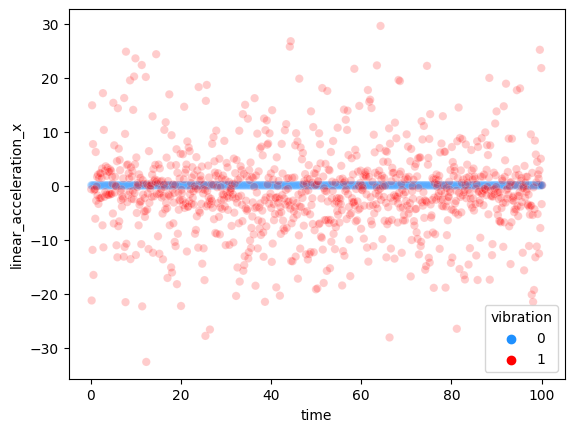

In [124]:
sns.scatterplot(data=df, x='time', y='linear_acceleration_x', hue='vibration', alpha=0.2, palette=['dodgerblue', 'red'] )

<Axes: xlabel='time', ylabel='linear_acceleration_y'>

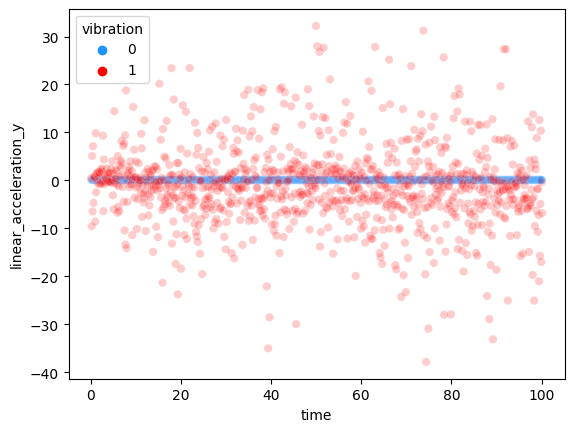

In [125]:
sns.scatterplot(data=df, x='time', y='linear_acceleration_y', hue='vibration', alpha=0.2, palette=['dodgerblue', 'red'] )

<Axes: xlabel='time', ylabel='linear_acceleration_z'>

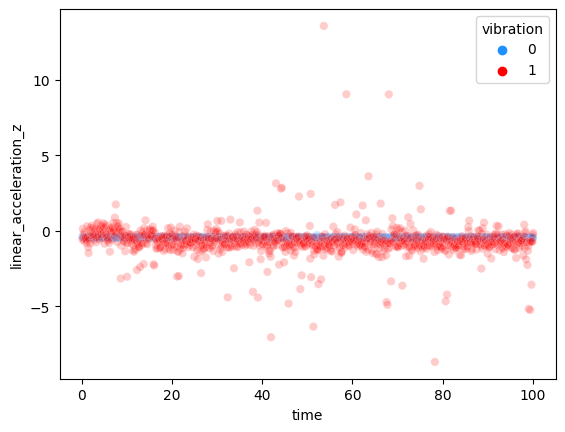

In [126]:
sns.scatterplot(data=df, x='time', y='linear_acceleration_z', hue='vibration', alpha=0.2, palette=['dodgerblue', 'red'] )

<Axes: xlabel='time', ylabel='absolute_linear_acceleration'>

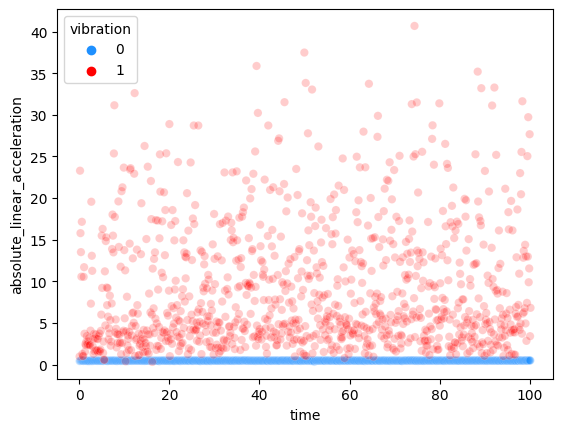

In [127]:
sns.scatterplot(data=df, x='time', y='absolute_linear_acceleration', hue='vibration', alpha=0.2, palette=['dodgerblue', 'red'] )

## Prepare Data

Some machine learning models will need us to scale the values to the same range.  

RandomForestClassifier does not have that restriction

In [128]:
df.drop(columns=['time'], inplace=True)

In [129]:
y = df['vibration']
X = df.drop(columns=['vibration'])

In [130]:
X.shape

(2000, 4)

In [131]:
y.shape

(2000,)

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

## Train a Machine Learning Model

In [134]:
model = RandomForestClassifier()

In [135]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
y_pred_train = model.predict(X_train)


In [137]:
accuracy_score(y_train, y_pred_train)


1.0

## Test Machine Learning Model

In [138]:
y_pred_test = model.predict(X_test)

In [139]:
accuracy_score(y_test, y_pred_test)

0.9975

### What were the most important features to the RandomForestClassifier model

In [140]:
importance_list = []

for tup in zip(X_train.columns, model.feature_importances_):
    
    importance_list.append(tup) 
sorted_importance_list = sorted(importance_list, key=lambda tup: tup[1], reverse = True)
sorted_importance_list[0:10]

[('absolute_linear_acceleration', 0.6567076855663571),
 ('linear_acceleration_z', 0.19801921246736176),
 ('linear_acceleration_x', 0.11209966808921744),
 ('linear_acceleration_y', 0.03317343387706371)]

## Make Predictions on new data

Before we make predictions on new data, we would like to re-train the model on all of the collected data.

In [141]:
model = RandomForestClassifier()

In [142]:
model.fit(X,y)

RandomForestClassifier()

In [143]:
# Save the model so we can use it to autonmously drive the car
import joblib

joblib.dump(model, "./vibration_detector_model.sav")


['./vibration_detector_model.sav']

Let's go write a new script to read new data from the databot and use the model to make new predictions.